# Assignment 1

### Dibya Bharati Pradhan
### Roll No. 1911067

In [2]:
from Library_Dibya import *
import matplotlib.pyplot as plt


### Question 1 - Solve $\exp(−x) − x = 0$ using fixed-point method, accurate up to 4 places in decimal.

In [3]:
def func_Q1(x):
    return math.exp(-x)

x_0=1.0 # guess
tol=1e-6

root, iterations = fixed_point(func_Q1, x_0, tol)

print("Root:", ROUND(root, 4))
print("Iterations:", iterations)


Root: 0.5671
Iterations: 24


### Question 2 - Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal.
$$ \int^1_0 \sqrt{1+x^4} dx $$


In [3]:
def func_Q2(x):
    return math.sqrt(1 + x**4)

a = 0
b = 1
tol = 1e-7

# SIMPSON'S RULE
iterations_simpson = calculate_N_s(func_Q2, a, b, tol)
integral_simpson = int_simpson(func_Q2, a, b, tol)
print("Integral:", ROUND(integral_simpson, 6))
print("Iterations:", iterations_simpson)


Integral: 1.089429
Iterations: 30


In [4]:
# GAUSSIAN QUADRATURE
integral_gaussian, iterations_gaussian = Gaussian_quadrature(func_Q2, a, b, tol)
print("Integral:", ROUND(integral_gaussian, 6))
print("iterations - P_n(x) order:", iterations_gaussian)


Integral: 1.089429
iterations - P_n(x) order: 6


### Question 3 - Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01. Tabulate your results.
$$ y' = \dfrac{5x^2-y}{\exp(x+y)} \quad \text{and} \quad y(0)=1.0$$


h =  0.5
X =  [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
Y =  [1.0, 0.9131933683646087, 1.071926337431937, 1.3497825979875036, 1.619126470691553, 1.83824936767521, 2.005498075030705, 2.1297500929543, 2.2207648103275504, 2.286800411823143, 2.334331392605505]


h =  0.2
X =  [0.0, 0.2, 0.4, 0.6000000000000001, 0.8, 1.0, 1.2, 1.4, 1.5999999999999999, 1.7999999999999998, 1.9999999999999998, 2.1999999999999997, 2.4, 2.6, 2.8000000000000003, 3.0000000000000004, 3.2000000000000006, 3.400000000000001, 3.600000000000001, 3.800000000000001, 4.000000000000001, 4.200000000000001, 4.400000000000001, 4.600000000000001, 4.800000000000002, 5.000000000000002]
Y =  [1.0, 0.93779727329182, 0.9104446690637412, 0.9267111805650831, 0.9838122238669428, 1.0715857107318785, 1.1778273262796006, 1.291957348494306, 1.4063579243864295, 1.5162271432059786, 1.6188961773810306, 1.713129664583051, 1.7985844251490697, 1.8754390477572995, 1.9441565799629326, 2.0053386106025135, 2.059638327471879, 2.10771035

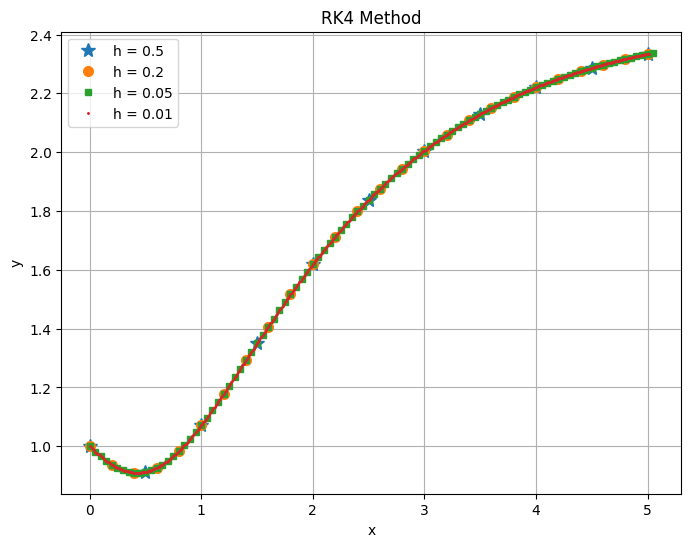

In [5]:
def dydx(x, y):
    return (5*x**2-y)/(math.exp(x+y))

x0 = 0.0
xn = 5.0
y0 = 1.0

h = [0.5, 0.2, 0.05, 0.01]
ticks = ['*', 'o', 's', 'D']


plt.figure(figsize=(8, 6))
for i in range(4):
    X, Y = ODE_1D_RK4(dydx, y0, x0, xn, h[i])
    print("h = ", h[i])
    print("X = ", X)
    print("Y = ", Y)
    print("\n")
    plt.plot(X, Y, ticks[i], label="h = " + str(h[i]), markersize=10-3*i)

plt.xlabel("x")
plt.ylabel("y")
plt.title("RK4 Method")
plt.legend()
plt.grid()
plt.show()



### Question 4 - Solve the heat equation $u_t = 4u_{xx}$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions
$$ u(0, t) = 0 = u(8, t) \quad \text{and} \quad x(x, 0) = 4x − \dfrac{x^2}{2} $$
### Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of $\alpha$ and inversion algorithm. Display the solution both in a table and a contour plot.



In [6]:

def initial_condition(x):
    return 4*x - x**2/2

L = 8.0     # Length of the rod
T = 10.0    # Total time
dx = 0.1    # Spatial step size
dt = 0.01   # Time step size
diff = 4    # Thermal diffusivity

ans, spatial_grid, time_grid = crank_nicolson_heat_diffusion(L, T, dx, dt, diff, initial_condition)

# Tabulate the solution
print(f"Solution: {ans}")


Solution: [[0.00000000e+00 3.85000000e-01 2.43333333e-01 ... 8.92068663e-04
  8.86847054e-04 8.81656010e-04]
 [3.95000000e-01 5.67500000e-01 6.18333333e-01 ... 1.78282809e-03
  1.77239254e-03 1.76201807e-03]
 [7.80000000e-01 8.46250000e-01 9.22500000e-01 ... 2.67097097e-03
  2.65533679e-03 2.63979412e-03]
 ...
 [7.80000000e-01 8.46250000e-01 9.22500000e-01 ... 2.67097097e-03
  2.65533679e-03 2.63979412e-03]
 [3.95000000e-01 5.67500000e-01 6.18333333e-01 ... 1.78282809e-03
  1.77239254e-03 1.76201807e-03]
 [0.00000000e+00 3.85000000e-01 2.43333333e-01 ... 8.92068663e-04
  8.86847054e-04 8.81656010e-04]]


Since the Crank-Nicholson method is stable for $\alpha > 0.5$ too, unlike other explicit methods, we can choose any convenient $\alpha$. Here we have taken 
$$ \alpha = \text{Diff} \times \dfrac{\Delta t}{\Delta x^2} = 4 \times \dfrac{0.01}{0.1^2} = 4 $$


In [1]:
def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def plot_diffusion_eqn():
    plt.figure(figsize=(5, 4))
    plt.imshow(ans, extent=[0, L, 0, T], aspect='auto', origin='lower', cmap='hot')
    plt.colorbar(label='Temperature')
    plt.title('Heat Diffusion using Crank-Nicolson method)')
    plt.xlabel('Length')
    plt.ylabel('Time')

ans = transpose(ans)

# Plot the diffusion equation solution
plot_diffusion_eqn()
plt.show()


NameError: name 'ans' is not defined

# Question 5
### Solve the Poisson’s equation $u_{xx} + u_{yy} = xe^y$ in a $6^2$ grid with boundary conditions
$$ u(0, y) = 0 \quad \text{and} \quad u(2, y) = 2e^y $$
$$ u(x, 0) = x \quad \text{and} \quad u(x, 1) = xe $$
### Display the solution both in a table and a 3-D plot.

In [8]:

def poisson_boundary_condition(n_x, n_y, x, y):

    # Initial guess
    u = [ [ 0 for j in range(n_y)] for i in range(n_x)]

    # Apply boundary conditions
    for j in range(n_y):
        u[0][j] = 0
        u[-1][j] = 2 * math.exp(y[j])

    for i in range(n_x):
        u[i][0] = x[i]
        u[i][-1] = x[i] * math.exp(1)

    return u


In [9]:
# Set parameters
N_x = 6
N_y = 4
L_x = 2.0
L_y = 1.0

# Solve Poisson equation with boundary conditions
X, Y, u = poisson_eqn_solver(N_x, N_y, L_x, L_y, poisson_boundary_condition)

# Print the results in tabular form
print("X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t", "X\tY\tu\t")
for j in range(N_y):
    for i in range(N_x):
        print(f"{X[i]:.2f}", end="  ")
        print(f"{Y[j]:.2f}", end="  ")
        print(f"{u[i][j]:.4f}", end="  \t")
    print()

X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	 X	Y	u	
0.00  0.00  0.0000  	0.29  0.00  0.2857  	0.57  0.00  0.5714  	0.86  0.00  0.8571  	1.14  0.00  1.1429  	1.43  0.00  1.4286  	
0.00  0.20  0.0000  	0.29  0.20  0.3754  	0.57  0.20  0.7518  	0.86  0.20  1.1315  	1.14  0.20  1.5205  	1.43  0.20  1.9371  	
0.00  0.40  0.0000  	0.29  0.40  0.4839  	0.57  0.40  0.9688  	0.86  0.40  1.4565  	1.14  0.40  1.9502  	1.43  0.40  2.4561  	
0.00  0.60  0.0000  	0.29  0.60  0.6156  	0.57  0.60  1.2317  	0.86  0.60  1.8486  	1.14  0.60  2.4654  	1.43  0.60  3.0750  	


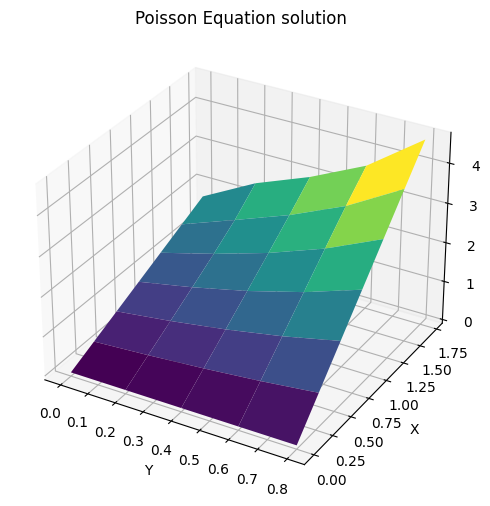

In [10]:
Y, X = np.meshgrid(Y, X)
u = np.array(u)

# Plot the solution
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, u, cmap='viridis')
ax.set_xlabel('Y')
ax.set_ylabel('X')
ax.set_zlabel('Solution (u)')
ax.set_title('Poisson Equation solution')
plt.show()